## Welcome to Day 11 - Homework!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('housepricesdata.csv')

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

##### Nomor 1

In [ ]:
# Mengecek kolom mata uang dan harga tahunan
df[['Currency', 'Annual_Price']]

,Currency,Annual_Price
0,IDR,96000000
1,IDR,30000000
2,IDR,70000000
3,IDR,576000000
4,IDR,32000000
...,...,...
5298,IDR,36000000
5299,IDR,60000000
5300,IDR,250000000
5301,IDR,108000000


In [ ]:
# # Mengecek kolom mata uang "USD" dan harga tahunannya
df[df['Currency'] == 'USD'][['Currency', 'Annual_Price']]

,Currency,Annual_Price
76,USD,19800
358,USD,28800
443,USD,20400
453,USD,21600
462,USD,27600
770,USD,19200
781,USD,28800
1033,USD,42000
1055,USD,44400
1149,USD,54000


In [ ]:
# Mengonversi harga tahunan yang bermata uang USD ke IDR dan memasukannya ke kolom CleancedPrice
# harga tahunan yang bermata uang IDR tidak perlu dikonversi
df['CleanedPrice'] = df.apply(lambda x: 15000*x.Annual_Price if x.Currency == 'USD' else x.Annual_Price, axis=1)
# Mengecek data CleanedPrice
df[['Currency', 'Annual_Price', 'CleanedPrice']].loc[75:80]

,Currency,Annual_Price,CleanedPrice
75,IDR,132000000,132000000
76,USD,19800,297000000
77,IDR,567000000,567000000
78,IDR,65000000,65000000
79,IDR,35000000,35000000
80,IDR,84000000,84000000


##### Nomor 2

In [ ]:
# Mengecek data kolom Jumlah Bedrooms dan CleanedPrice
df[['No_Rooms', 'CleanedPrice']]

,No_Rooms,CleanedPrice
0,1,96000000
1,2,30000000
2,2,70000000
3,2,576000000
4,2,32000000
...,...,...
5298,2,36000000
5299,0,60000000
5300,2,250000000
5301,2,108000000


In [ ]:
# Melihat info umum dari kolom Jumlah Bedrooms dan CleanedPrice
df[['No_Rooms', 'CleanedPrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   No_Rooms      5303 non-null   int64
 1   CleanedPrice  5303 non-null   int64
dtypes: int64(2)
memory usage: 83.0 KB


In [ ]:
# Mengecek nilai unik dari kolom No_Rooms
df['No_Rooms'].unique()

array([1, 2, 3, 0, 4, 5, 6], dtype=int64)

Informasi yang didapat:
- Kolom No_Rooms dan CleanedPrice tidak memiliki missing values
- Kedua kolom tersebut bertipe data integer, masih wajar
- Keseluruhan data rumah mempunyai rentang bedrooms dari 0 hingga 6. No_Rooms = 0 artinya tanpa bedrooms.

In [ ]:
# Melihat statistik deskriptif dari kolom CleanedPrice
df['CleanedPrice'].describe()

count    5.303000e+03
mean     2.567181e+08
std      1.112211e+10
min      1.200000e+07
25%      4.200000e+07
50%      6.500000e+07
75%      1.265000e+08
max      8.100000e+11
Name: CleanedPrice, dtype: float64

Dari informasi statistik deskriptif tersebut, terdapat kejanggalan yaitu jarak antara quartil 75% dan nilai maksimumnya sangat jauh sekali. Terdapat perbedaan 3 digit. Ini sangat janggal.

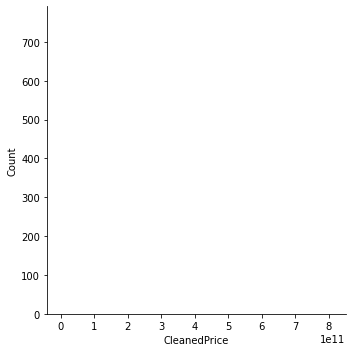

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['CleanedPrice']);
# Notes: Jangan clear output, cell ini butuh waktu lama untuk running

Saking jauhnya jarak kuartil atas dan nilai maksimumnya, ketika dibuat histogram plot tidak tampak sama sekali.

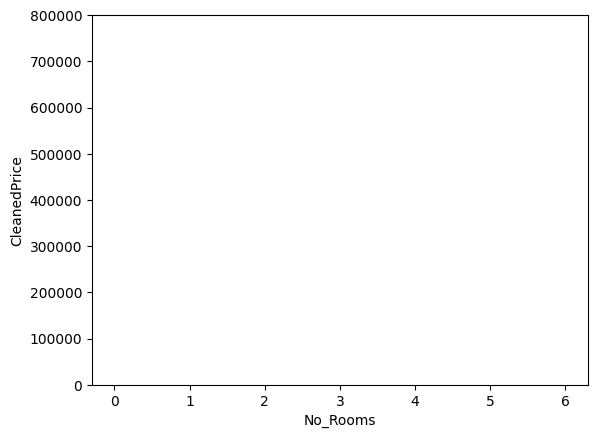

In [ ]:
data = pd.concat([df['No_Rooms'], df['CleanedPrice']], axis=1)
data.plot.scatter(x='No_Rooms', y='CleanedPrice', ylim=(0,800000));
# Notes: Jangan clear output, cell ini butuh waktu lama untuk running

Ketika dibuat scatterplot juga tidak tampak titik-titik datanya.

In [ ]:
def vis_univar(column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(x = column, ax = ax_box)
    sns.histplot(x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

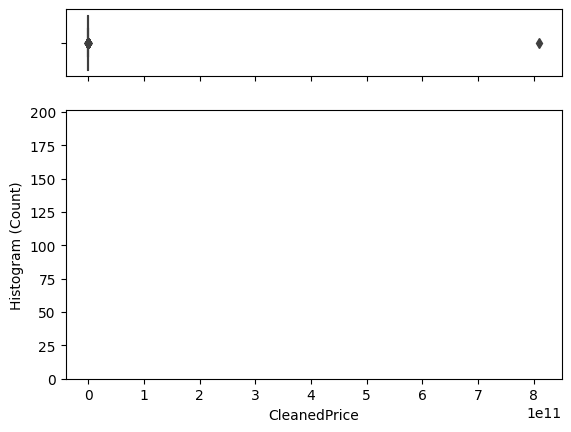

In [ ]:
vis_univar(df[df['No_Rooms'] == 0]['CleanedPrice'])
# Notes: Jangan clear output, cell ini butuh waktu lama untuk running

Sepertinya nilai maksimum ini termasuk di kategori No_Rooms = 0 atau tanpa Bedroom sama sekali. Apakah rumah ini adalah aula yang sangat besar sehingga harga sewa tahunannya sangat mahal?

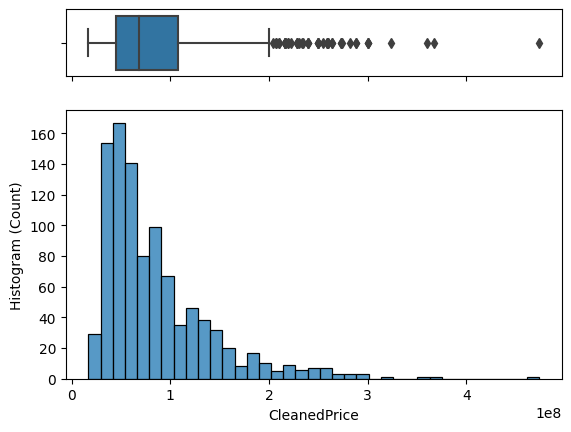

In [ ]:
vis_univar(df[df['No_Rooms'] == 1]['CleanedPrice'])

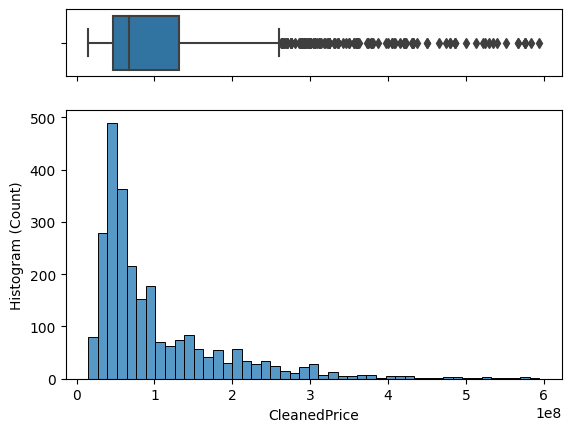

In [ ]:
vis_univar(df[df['No_Rooms'] == 2]['CleanedPrice'])

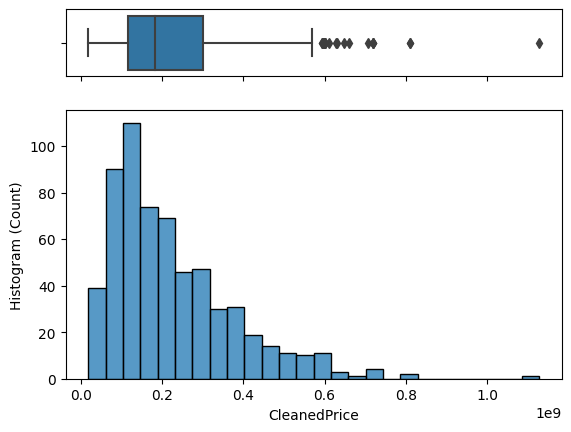

In [ ]:
vis_univar(df[df['No_Rooms'] == 3]['CleanedPrice'])

Rumah dengan jumlah bedrooms 1 sampai 3 distribusinya masih masuk akal. Skewedness juga cukup masuk akal

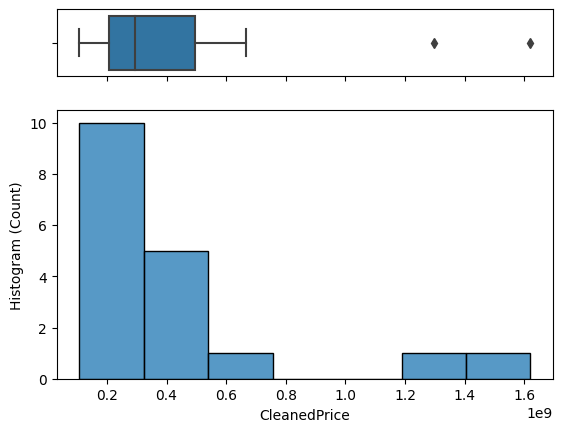

In [ ]:
vis_univar(df[df['No_Rooms'] == 4]['CleanedPrice'])

In [ ]:
df[df['No_Rooms'] == 5]['CleanedPrice']

743     702000000
1865    763600000
Name: CleanedPrice, dtype: int64

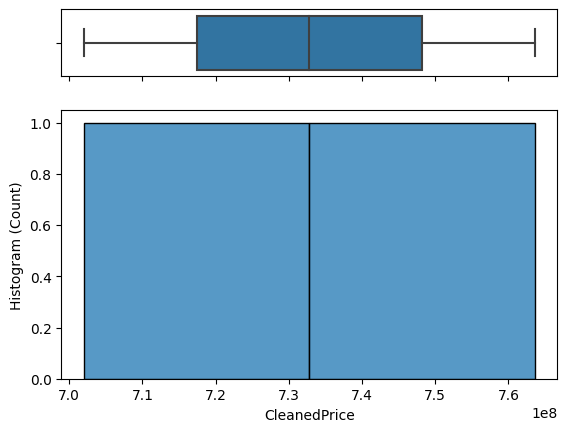

In [ ]:
vis_univar(df[df['No_Rooms'] == 5]['CleanedPrice'])

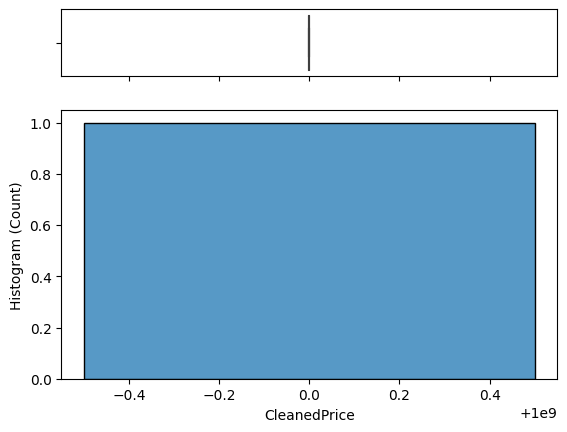

In [ ]:
vis_univar(df[df['No_Rooms'] == 6]['CleanedPrice'])

Sedangkan Jumlah Bedrooms 4 sampai 6 tampak tidak wajar karena jumlah data dengan jumlah bedrooms tersebut sangat sedikit. Hal ini masih bisa diterima.

In [ ]:
df.sort_values(by='CleanedPrice', ascending=False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000
3923,Pakubuwono Residence 4BR Tower CottonWood,4,4,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,1,548.0,Tower CottonWood,24,USD,108000,1620000000
3622,Pacific Place Residence 4BR Semi Furnished,4,5,SCBD,Jakarta Selatan,106.810134,-6.225613,0,500.0,Tower 2,21,IDR,1296000000,1296000000
4395,Essence Darmawangsa Apartment 3BR Tower East,3,3,Dharmawangsa,Jakarta Selatan,106.804426,-6.258746,1,322.0,Tower East,22,IDR,1128000000,1128000000
3611,ST Moritz Apartment 6BR Fully Furnished,6,4,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,576.0,Tower Ambassador,24,IDR,1000000000,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,The Springlake Summarecon Studio View Mall,0,1,Summarecon Bekasi,Bekasi,106.999000,-6.222400,0,21.0,Tower Davallia,12,IDR,15000000,15000000
2131,Delta Cakung Apartment Studio Tower Tower DB,0,1,Cakung,Jakarta Timur,106.933983,-6.193510,1,21.0,Tower Tower DB,18,IDR,15000000,15000000
1806,Margonda Residence Studio View Garden,0,1,Margonda,Depok,106.834500,-6.363500,1,21.0,Tower D,5,IDR,14000000,14000000
5165,Kota Ayodhya Apartment Studio Non Furnished,0,1,Cikokol,Tangerang,106.629106,-6.199893,0,23.0,Tower Sienna,17,IDR,12000000,12000000


Jika kolom CleanedPrice disortir dari nilai yang paling tinggi, ternyata harga antara tertinggi ke-1 dan ke-2 sangat berbeda jauh 810.000.000.000 IDR dan 1.620.000.000 IDR. Nilai tertinggi ke-1 Luasnya hanya 25, sedangkan tertinggi ke-2 luasnya 548. Rumah dengan nilai tertinggi ke-1 itu ternyata bukan aula yang sangat besar. Sepertinya ini sebuah anomali.

Jika melihat dari kolom Annual_Price ternyata nilainya 54.000.000 USD. Nilainya terlalu tinggi untuk No_Rooms = 0. Saya berpikir kalau ini adalah kesalahan input matauang. Jika matauang tersebut IDR, maka lebih masuk akal. Karena sebagian besar CleanedPrice dengan No_Rooms = 0 pun juga sekitar "puluhan juta". Sehingga saya memutuskan untuk mengubah nilai matauang dari data yang anomali tersebut ke IDR

In [ ]:
df.at[1163, 'CleanedPrice'] = 810000000000/15000

In [ ]:
# Mengecek outliers dari CleanedPrice (IQR)
q1 = df['CleanedPrice'].quantile(0.25)
q3 = df['CleanedPrice'].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

outliers = df.loc[(df['CleanedPrice'] < fence_low) | (df['CleanedPrice'] > fence_high)]

##### Nomor 3

In [ ]:
df.groupby("Region").mean()["CleanedPrice"]

Region
Bandung            6.551515e+07
Batam              7.200000e+07
Bekasi             4.401500e+07
Bogor              5.833333e+07
Depok              3.752500e+07
Jakarta Barat      7.317143e+07
Jakarta Pusat      1.057522e+08
Jakarta Selatan    1.758484e+08
Jakarta Timur      5.038338e+07
Jakarta Utara      6.139668e+07
Jogjakarta         6.000000e+07
Karawang           4.740000e+07
Makassar           6.000000e+07
Malang             3.500000e+07
Semarang           3.700000e+07
Sumedang           2.675000e+07
Surabaya           3.847692e+07
Tangerang          4.647826e+07
Name: CleanedPrice, dtype: float64

In [ ]:
df.groupby("Region").mean()["CleanedPrice"].max()

175848427.26081258

Jakarta Selatan mempunyai nilai rerata paling tinggi

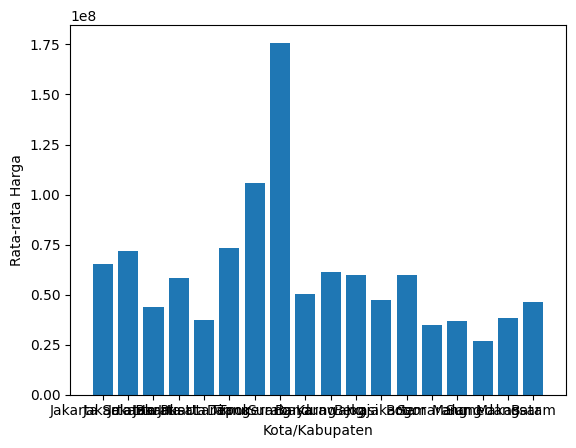

In [ ]:
# Mendapatkan data unik dari kolom Region
x = pd.Series(df['Region'].unique())
# Mengelompokkan data menggunakan groupby yang dirata-ratakan menurut kolom Region, & menampilkan kolom CleanedPrice
y = df.groupby("Region").mean()["CleanedPrice"]

# Menampilkan bar plot
fig = plt.figure()
plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Kota/Kabupaten')
plt.ylabel('Rata-rata Harga')
plt.show()

##### Nomor 4

In [ ]:
df[['Longitude', 'Latitude']]

,Longitude,Latitude
0,106.819159,-6.226598
1,106.756061,-6.192081
2,106.757651,-6.186415
3,106.784600,-6.272637
4,106.796056,-6.153652
...,...,...
5298,106.993400,-6.243400
5299,106.664000,-6.294400
5300,106.829330,-6.216540
5301,106.801738,-6.202296


In [ ]:
Longitudes = df['Longitude']
df[Longitudes.isin(Longitudes[Longitudes.duplicated()])]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


In [ ]:
df[df['Longitude'] == 106.873191]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
5,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Fagio,21,IDR,60000000,60000000
9,Green Pramuka City Apartment 2BR Tower Penelope,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,0,33.0,Tower Penelope,17,IDR,33000000,33000000
85,Green Pramuka City Apartment 2BR View City & s...,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Scarlet,21,IDR,67150000,67150000
97,Green Pramuka City Apartment 2BR Tower orcid,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Orchid,23,IDR,78000000,78000000
143,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Magnolia,20,IDR,57000000,57000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,Tower Chrysant,22,IDR,60000000,60000000
5062,Green Pramuka City Apartment 2BR View City,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,0,33.0,Tower Bougenville,17,IDR,35000000,35000000
5074,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,35.0,Tower Orchid,21,IDR,42000000,42000000
5089,Green Pramuka City Apartment 2BR Fully Furnished,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,40.0,Tower Pino,20,IDR,49000000,49000000


In [ ]:
Latitudes = df['Latitude']
df[Latitudes.isin(Latitudes[Latitudes.duplicated()])]

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


Terdapat duplicate dari data Latitude dan Longitude. Tapi, pada kolom lainnya memiliki nama yang berbeda dan harga yang berbeda pula. Apakah penyewa menyewakan rumahnya untuk setiap lantai dengam harga yang berbeda? Ataukah data yang memiliki koordinat yang sama menunjukkan jika rumah-rumah tersebut masuk ke dalam 1 klaster perumahan?

In [ ]:
# Mengecek outliers dari CleanedPrice (IQR)
q1 = df['Latitude'].quantile(0.25)
q3 = df['Latitude'].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

outliers = df.loc[(df['Latitude'] < fence_low) | (df['Latitude'] > fence_high)]

In [ ]:
outliers

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
20,Taman Melati Margonda Apartment Studio Tower A,0,1,Margonda,Depok,106.832472,-6.360354,1,23.0,Tower A,14,IDR,36000000,36000000
54,Puncak Kertajaya Apartment 2BR Non Furnished,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,0,36.0,Tower A,11,IDR,23000000,23000000
79,Sudirman Suites Apartment Bandung,0,1,Cicendo,Bandung,107.581300,-6.916200,1,23.0,Tower MAHOGANY,14,IDR,35000000,35000000
80,Tamansari Mahogany Apartment 2BR Fully Furnished,2,1,Pantura,Karawang,107.271100,-6.339400,1,48.0,Tower Tower 1,15,IDR,84000000,84000000
84,Parahyangan Residence 2BR View City,2,1,Ciumbuleuit,Bandung,107.603500,-6.876700,1,43.0,Tower Pangrango,14,IDR,70000000,70000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,Podomoro Golf View Apartment Studio Furnished,0,1,Cimanggis,Depok,106.893900,-6.427400,1,21.0,Tower Dahoma,13,IDR,30000000,30000000
5130,Gateway Pasteur Apartment 2BR View Gunung,2,1,Pasteur,Bandung,107.566476,-6.889129,0,47.0,Tower Topaz b,15,IDR,35000000,35000000
5132,Saladdin Mansion Studio Tower B,0,1,Margonda,Depok,106.824100,-6.392900,0,15.0,Tower B,12,IDR,18000000,18000000
5185,Taman Melati Margonda Apartment Studio Semi Fu...,0,1,Margonda,Depok,106.832472,-6.360354,0,24.0,Tower B,15,IDR,42000000,42000000


outliers di latitude bisa dianggap wajar dan bukan merupakan kesalahan.